# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675976 sha256=9d5fb1749e231136a9464f5cb3e9a589288c57bdfbcc830ba40772971404b178
  Stored in directory: c:\users\drago\appdata\local\pip\cache\wheels\41\82\37\8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
from citipy import citipy
import numpy as np

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Reset record count

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Extract required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # Handle missing city data
    except Exception as e:
        print(f"City not found. Skipping... {city}")
        pass

    # Pause to avoid API rate limits
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | nova vicosa
Processing Record 4 of Set 1 | vilyuysk
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | natchez
Processing Record 7 of Set 1 | acapulco de juarez
Processing Record 8 of Set 1 | kapa'a
Processing Record 9 of Set 1 | trairi
Processing Record 10 of Set 1 | la'ie
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | ebon
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | dakhla
Processing Record 15 of Set 1 | jatai
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | wakkanai
Processing Record 18 of Set 1 | baki
Processing Record 19 of Set 1 | arkhangel'sk
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | praia da vitoria
Processing R

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.90,74,100,1.79,NZ,1738873685
1,afaahiti,-17.7500,-149.2833,25.89,79,36,5.99,PF,1738873686
2,nova vicosa,-17.8919,-39.3719,27.08,70,100,2.94,BR,1738873687
3,vilyuysk,63.7553,121.6247,-37.54,98,8,2.19,RU,1738873688
4,edinburgh of the seven seas,-37.0676,-12.3116,16.58,87,44,10.07,SH,1738873690


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,74,100,1.79,NZ,1738873685
1,afaahiti,-17.7500,-149.2833,25.89,79,36,5.99,PF,1738873686
2,nova vicosa,-17.8919,-39.3719,27.08,70,100,2.94,BR,1738873687
3,vilyuysk,63.7553,121.6247,-37.54,98,8,2.19,RU,1738873688
4,edinburgh of the seven seas,-37.0676,-12.3116,16.58,87,44,10.07,SH,1738873690


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

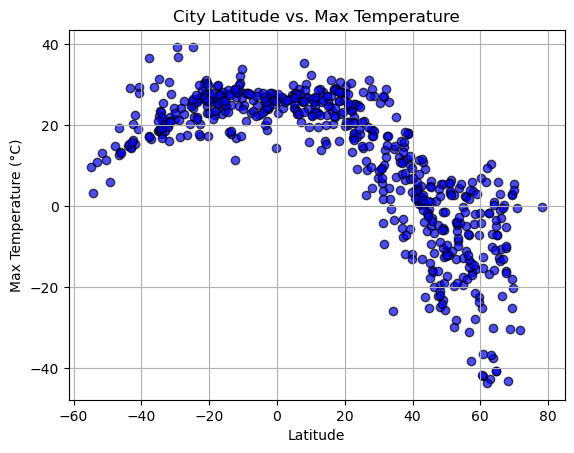

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

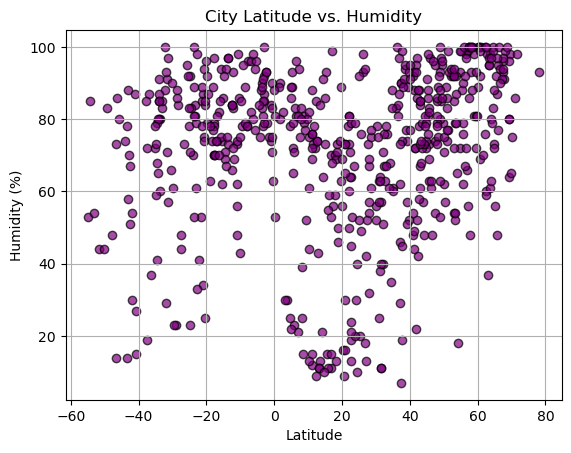

In [31]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='purple', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

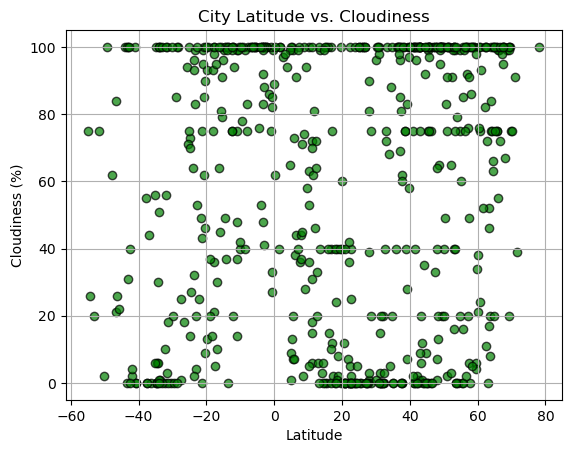

In [32]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='green', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

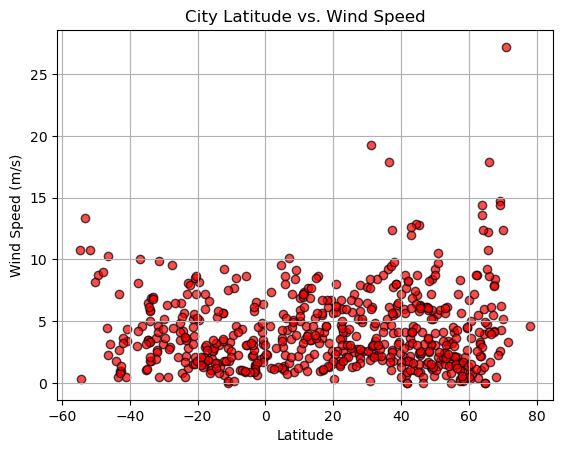

In [33]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='red', edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, output_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate the regression line
    regression_line = slope * x_data + intercept
    
    # Create scatter plot
    plt.scatter(x_data, y_data, color='blue', edgecolor='black', alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best")
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_filename)
    
    # Show plot
    plt.show()


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vilyuysk,63.7553,121.6247,-37.54,98,8,2.19,RU,1738873688
5,natchez,31.5604,-91.4032,27.12,57,0,6.17,US,1738873691
6,acapulco de juarez,16.8634,-99.8901,28.90,70,40,3.60,MX,1738873396
7,kapa'a,22.0752,-159.3190,24.18,81,0,1.54,US,1738873694
9,la'ie,21.6477,-157.9253,24.97,78,7,1.79,US,1738873699


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,74,100,1.79,NZ,1738873685
1,afaahiti,-17.7500,-149.2833,25.89,79,36,5.99,PF,1738873686
2,nova vicosa,-17.8919,-39.3719,27.08,70,100,2.94,BR,1738873687
4,edinburgh of the seven seas,-37.0676,-12.3116,16.58,87,44,10.07,SH,1738873690
8,trairi,-3.2778,-39.2689,27.20,78,48,5.80,BR,1738873696


###  Temperature vs. Latitude Linear Regression Plot

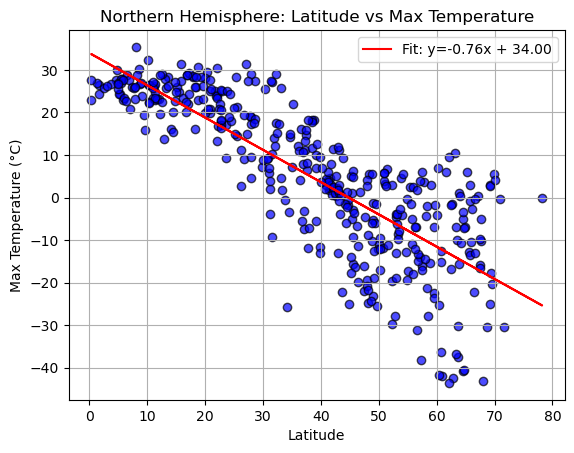

In [43]:
# Linear regression on Northern Hemisphere - Latitude vs. Max Temperature
create_linear_regression_plot(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Northern Hemisphere: Latitude vs Max Temperature', 
    'output_data/Fig6_NorthernHemisphere.png'
)


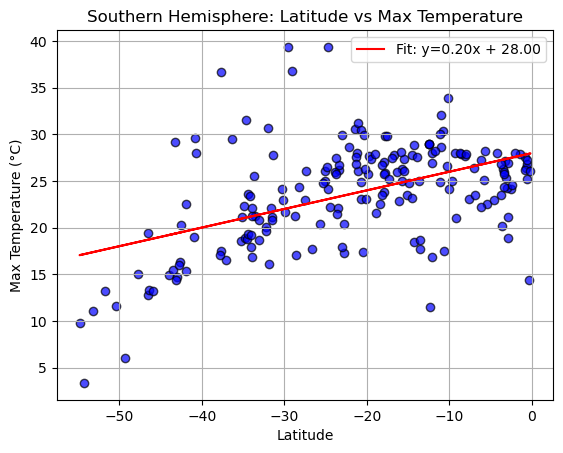

In [44]:
# Linear regression on Southern Hemisphere - Latitude vs. Max Temperature
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Southern Hemisphere: Latitude vs Max Temperature', 
    'output_data/Fig7_SouthernHemisphere.png'
)


**Discussion about the linear relationship:** The general trend tends to show that the closer to the equator the higher the average temperatures will be.

### Humidity vs. Latitude Linear Regression Plot

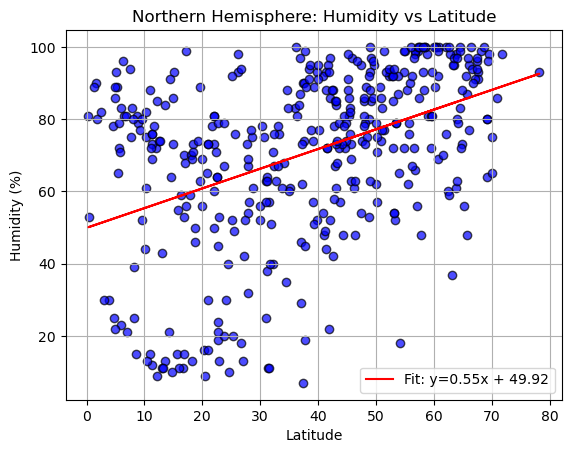

In [46]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Northern Hemisphere: Humidity vs Latitude', 
    'output_data/Fig8_NorthernHemisphere_Humidity.png'
)


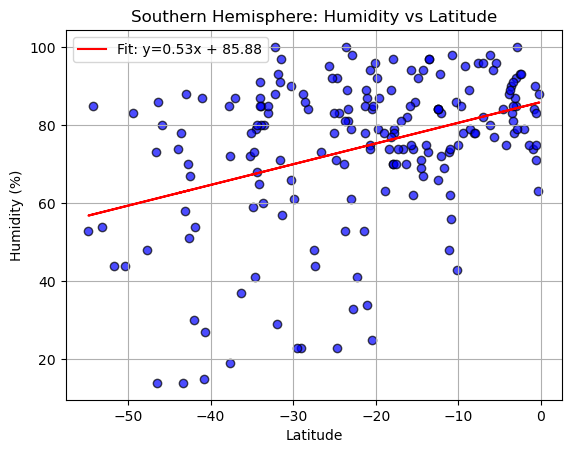

In [47]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Southern Hemisphere: Humidity vs Latitude', 
    'output_data/Fig9_SouthernHemisphere_Humidity.png'
)


**Discussion about the linear relationship:** Higher humidity as you get closer to the equator as well.

### Cloudiness vs. Latitude Linear Regression Plot

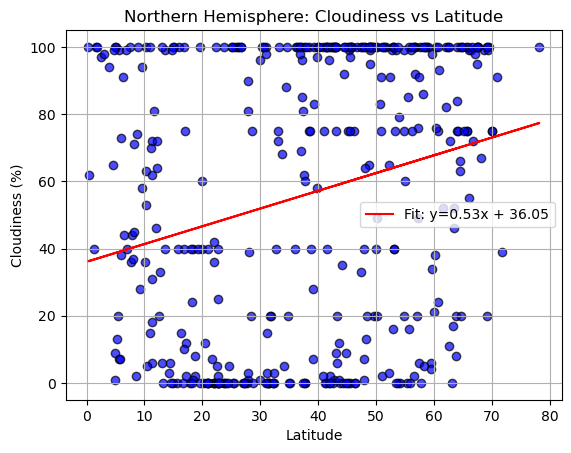

In [48]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Northern Hemisphere: Cloudiness vs Latitude', 
    'output_data/Fig10_NorthernHemisphere_Cloudiness.png'
)


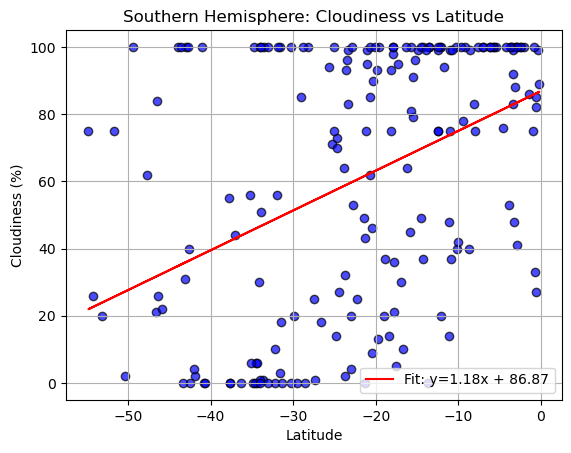

In [49]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Southern Hemisphere: Cloudiness vs Latitude', 
    'output_data/Fig11_SouthernHemisphere_Cloudiness.png'
)


**Discussion about the linear relationship:** The latitude vs. cloudiness relationship is less predictable and may not follow a clear linear pattern.

### Wind Speed vs. Latitude Linear Regression Plot

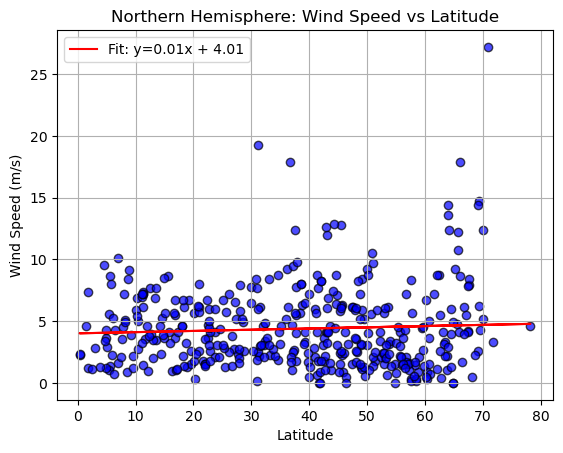

In [50]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (m/s)', 
    'Northern Hemisphere: Wind Speed vs Latitude', 
    'output_data/Fig12_NorthernHemisphere_WindSpeed.png'
)


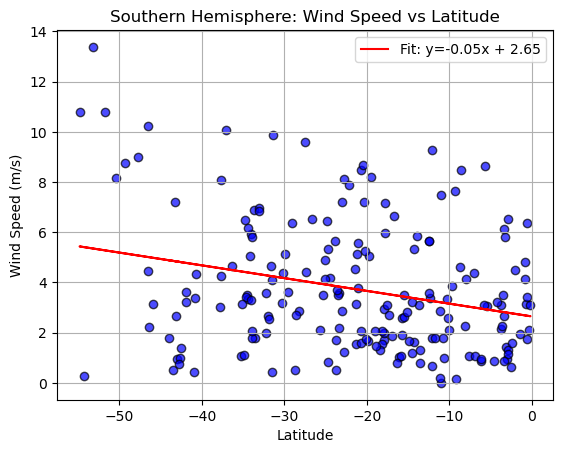

In [51]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (m/s)', 
    'Southern Hemisphere: Wind Speed vs Latitude', 
    'output_data/Fig13_SouthernHemisphere_WindSpeed.png'
)


**Discussion about the linear relationship:**  This relationship is generally characterized by lower wind speeds near the equator, with moderate to high wind speeds in the mid-latitudes.